# <center> Analyses des ventes de la librairie en ligne Lapage </center>
# <center> 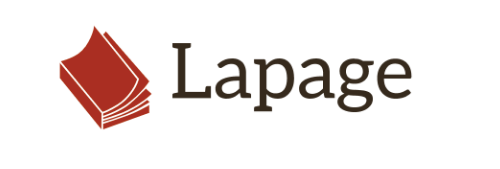 </center>


# <b> Sommaire </b>

## <b>I - Retraitement des fichiers BDD</b>

## <b>II - Analyse univariée (Demandes d'Antoine)</b>

    1) Analyse CA
    2) Analyse produits
    3) Analyse clients
    
## <b>III - Analyse bivariée (Demandes de Julie)<b>

    1) Genre et catégorie 
    2) Age et dépenses 
    3) Age et fréquence 
    4) Age et panier 
    5) Age et catégorie

# I - Retraitement des fichiers BDD

In [1]:
# import des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import kstest
import warnings

In [2]:
# ignore le message d'erreur openpyxl qui s'affiche lors de la lecture des fichiers .xlsx mais qui n'empeche pas le chargement
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

# import des 3 fichiers excel dans des  : erp, web et liaison

data_transactions = pd.read_csv('transactions.csv')
data_customers = pd.read_csv('customers.csv')
data_products = pd.read_csv('products.csv')



In [3]:
def description(fichier):

    ## affiche le nombre de lignes et de variables dans le dataframe
    print("data shape :", fichier.shape,'\n')
      
    ## liste les variables et indique le type de valeurs qu'elles contiennent
    print(fichier.dtypes, '\n')
    
    ## décrit le contenu des variables et indique le nombre de valeurs,les quartiles, min, max, moy, median
    print(fichier.describe(), '\n')
    
    ## calcul le nombre de nan pour chaque variable et affiche celles qui en ont au moins 1
    nb_na = fichier.isnull().sum()
    print("vérification nan :",'\n',nb_na[nb_na>0])


In [4]:
# Analyse du fichier products
description(data_products)

data shape : (3287, 3) 

id_prod     object
price      float64
categ        int64
dtype: object 

             price        categ
count  3287.000000  3287.000000
mean     21.856641     0.370246
std      29.847908     0.615387
min      -1.000000     0.000000
25%       6.990000     0.000000
50%      13.060000     0.000000
75%      22.990000     1.000000
max     300.000000     2.000000 

vérification nan : 
 Series([], dtype: int64)


<div class="alert alert-warning">
<b> Warning : On remarque une valeur minimale negative, il va falloir investiguer pour comprendre de quoi il s'agit.</b></div>

In [5]:
# afficher le nombre de doublons
print("Il y a", data_products.duplicated('id_prod').sum(), "id_prod en doublons")

Il y a 0 id_prod en doublons


<div class="alert alert-success">
<b> Il n'y a pas d'identifiant produit en doublon, cela signifique tous les produits ont bien un identifiant unique (vu qu'il n'y a pas également de NaN identifié dans l'étape précédente)</div>

In [6]:
# Analyse du fichier customers
description(data_customers)

data shape : (8623, 3) 

client_id    object
sex          object
birth         int64
dtype: object 

             birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000 

vérification nan : 
 Series([], dtype: int64)


In [7]:
# afficher le nombre de doublons
print("Il y a", data_customers.duplicated('client_id').sum(), "client_id en doublons")

Il y a 0 client_id en doublons


<div class="alert alert-success">
<b> Il n'y a pas d'identifiant client en doublon, cela signifique tous les clients ont bien un identifiant unique (vu qu'il n'y a pas également de NaN identifié dans l'étape précédente)</b></div>



In [8]:
# Analyse du fichier transactions
description(data_transactions)

data shape : (679532, 4) 

id_prod       object
date          object
session_id    object
client_id     object
dtype: object 

       id_prod                             date session_id client_id
count   679532                           679532     679532    679532
unique    3267                           679371     342316      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      2252                               13        200     25488 

vérification nan : 
 Series([], dtype: int64)


<div class="alert alert-warning">
<b> On remarque une valeur étrange commençant par "test" et finissant par une date dans la variable date qui semble correspondre à une transaction test.</b></div>

In [9]:
# creé un df_tableau_complet et ajout au fichier transactions les infos du df data_products (clé = id_prod)
df_tableau_complet = pd.merge(data_transactions,data_products, on='id_prod', how='left')

In [10]:
# ajout au nouveau df les infos du df data_customers (clé = client_id)
df_tableau_complet = pd.merge(df_tableau_complet,data_customers, on='client_id', how='left')
df_tableau_complet

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980
...,...,...,...,...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489,12.99,0.0,f,1951
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370,10.99,1.0,f,1977
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304,12.99,0.0,f,1988
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227,4.98,0.0,m,1986


In [11]:
description(df_tableau_complet)

data shape : (679532, 8) 

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
dtype: object 

               price          categ          birth
count  679311.000000  679311.000000  679532.000000
mean       17.449340       0.441823    1977.817964
std        18.329034       0.595002      13.578383
min        -1.000000       0.000000    1929.000000
25%         8.820000       0.000000    1970.000000
50%        13.990000       0.000000    1980.000000
75%        18.990000       1.000000    1987.000000
max       300.000000       2.000000    2004.000000 

vérification nan : 
 price    221
categ    221
dtype: int64


<div class="alert alert-warning">
<b> Je me retrouve avec un fichier comprenant les informations compilées issues des 3 fichiers, à l'issue du merge, je me retrouve avec 221 produits sans valeur pour les variables "price" et "categ" et à analyser les prix min / max déjà détectés tout à l'heure</b></div>

In [12]:
# filtre les lignes pour lesquelles la valeur de 'post_type' est nulle (nan)
check_tableau = df_tableau_complet.loc[df_tableau_complet['price'].isnull(),:]
check_tableau

,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,m,1940
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,f,1963
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,m,1978
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,m,1991
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,m,1973
...,...,...,...,...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,m,1981
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,f,1979
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,m,1981
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,m,1986


In [13]:
#afficher la liste des valeurs unique en variable "id_prod" suite au filtrage : 
liste_unique = set(check_tableau['id_prod'])
liste_unique

{'0_2245'}

<div class="alert alert-warning">
<b> Le produit 0_2245 est absent du fichier products, nous ne possédons donc pas d'informations à son sujet pour les variables prix et catégorie. Cependant, en regardant la variable id_prod, on peut déduire qu'il appartient à la catégorie 0 (code commençant par "0_". Afin de mener à bien l'analyse, nous allons estimer les ventes pour ce produit en se basant sur le prix moyen des produits de la catégorie 0. </b> </div>

In [14]:
# creation d'un df servant à l'estimation du CA
df_estimation_0 = df_tableau_complet.copy()
# filtrage sur la catégorie 0
df_estimation_0 = df_estimation_0.loc[df_estimation_0['categ']==0]
# calcul du prix moyen des produits de la catégorie 0
prix_estimation_0 = df_estimation_0['price'].mean()
# modification des valeurs en variable categ pour remplacer les valeurs NA en 0
df_tableau_complet['categ'] = df_tableau_complet['categ'].fillna(float(0))
# modification des valeurs en variable price pour remplacer par le prix moyen precedemment calculé
df_tableau_complet['price'] = df_tableau_complet['price'].fillna(float(prix_estimation_0))
# vérfication pour s'assurer que les modifs ont bien été appliquées. 
check_tableau = df_tableau_complet.loc[df_tableau_complet['id_prod']=="0_2245",:]
check_tableau


,id_prod,date,session_id,client_id,price,categ,sex,birth
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,10.632588,0.0,m,1940
10106,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,10.632588,0.0,f,1963
11727,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,10.632588,0.0,m,1978
15675,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,10.632588,0.0,m,1991
16377,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,10.632588,0.0,m,1973
...,...,...,...,...,...,...,...,...
669730,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,10.632588,0.0,m,1981
670682,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,10.632588,0.0,f,1979
671286,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,10.632588,0.0,m,1981
675679,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,10.632588,0.0,m,1986


In [15]:
# trier les valeurs en variable 'date' par ordre decroissant

check_dates = df_tableau_complet.sort_values('date', ascending=False)
check_dates

,id_prod,date,session_id,client_id,price,categ,sex,birth
246980,T_0,test_2021-03-01 02:30:02.237450,s_0,ct_0,-1.00,0.0,f,2001
573155,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,-1.00,0.0,f,2001
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,-1.00,0.0,m,2001
19312,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_0,-1.00,0.0,f,2001
392443,T_0,test_2021-03-01 02:30:02.237448,s_0,ct_0,-1.00,0.0,f,2001
...,...,...,...,...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960


<div class="alert alert-info">
<b> En analysant les formats de date étrange précédemment repérés, on remarque les choses suivantes : 

- Pour ces lignes avec une date étrange, l'id_prod qui commence normalement par *chiffre*_*nombre* commence ici par 'T' ce qui semble correspondre à un Test 
- Idem pour le client_id qui habituellement commence par c_*nombre*, ici commence par 'CT' qui semble correspondre à 'client test'. </b>

<b> Ces lignes semblent donc correspondre à des tests effectués sur le site de vente en ligne, il faut donc les exclure de nos analyses pour ne pas les fausser.</b> </div>

In [16]:
# Trier les valeurs en variable id-prod par ordre décroissant 
check_products = data_products.sort_values('id_prod', ascending=False)
check_products

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2
...,...,...,...
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0


<div class="alert alert-info">
<b> Il n'existe qu'un seul produit test (commençant par T), on va donc procéder au filtrage des lignes test en filtrant sur la valeur 'T_0' dans la variable id_prod.
    De plus, il s'agit du produit dont le prix est -1.00 que nous avions repéré plus tôt. </b></div>

In [17]:
## filtre sur les valeurs de la variable 'id_prod' différente de T_0

df_tableau_complet = df_tableau_complet.loc[df_tableau_complet['id_prod'] != 'T_0',:]
df_tableau_complet.sort_values('date', ascending=False)

,id_prod,date,session_id,client_id,price,categ,sex,birth
84274,0_1398,2023-02-28 23:58:30.792755,s_348435,c_3575,4.52,0.0,f,1981
550455,0_1547,2023-02-28 23:58:00.107815,s_348447,c_4848,8.99,0.0,m,1953
130172,1_695,2023-02-28 23:53:18.929676,s_348446,c_488,26.99,1.0,f,1985
588183,2_37,2023-02-28 23:51:29.318531,s_348445,c_50,48.99,2.0,f,1994
184649,1_508,2023-02-28 23:49:03.148402,s_348444,c_3573,21.92,1.0,f,1996
...,...,...,...,...,...,...,...,...
439073,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956
488300,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989
462702,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988
428477,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960


<div class="alert alert-success">
    <b> Il n'y a désormais plus de ligne test dans le dataframe.</b></div>

In [18]:
description(df_tableau_complet)

data shape : (679332, 8) 

id_prod        object
date           object
session_id     object
client_id      object
price         float64
categ         float64
sex            object
birth           int64
dtype: object 

               price          categ          birth
count  679332.000000  679332.000000  679332.000000
mean       17.452554       0.441809    1977.811139
std        18.326429       0.594998      13.574553
min         0.620000       0.000000    1929.000000
25%         8.870000       0.000000    1970.000000
50%        13.990000       0.000000    1980.000000
75%        18.990000       1.000000    1987.000000
max       300.000000       2.000000    2004.000000 

vérification nan : 
 Series([], dtype: int64)


<div class="alert alert-success">
    <b> Le prix mini n'est désormais plus une valeur négative </b></div>

<div class="alert alert-warning">
<b>Les dates sont au format objet, il faut les mettre au format date pour pouvoir les exploiter efficacement</b> </div>

In [19]:
# changer le format des valeurs en variable 'date' pour les mettres au format datetime
df_tableau_complet["date"] = pd.to_datetime(df_tableau_complet['date'])

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\2899947902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tableau_complet["date"] = pd.to_datetime(df_tableau_complet['date'])


In [20]:
# ajout d'une colonne avec les infos année-mois pour chaque ligne
df_tableau_complet['year_month']=df_tableau_complet['date'].dt.strftime('%Y-%m')
# ajout d'une colonne avec les infos année-mois-jour pour chaque ligne 
df_tableau_complet['formated_date_ymd']=df_tableau_complet['date'].dt.strftime('%y-%m-%d')
# ajout d'une colonne avec une valeur = 1 pour chaque ligne qui servira a calculer les volumes de vente 
df_tableau_complet['volume'] = 1
# trier les valeurs de la variable 'year_month' par ordre croissant
df_tableau_complet = df_tableau_complet.sort_values('year_month', ascending=True)
df_tableau_complet

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\798782602.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tableau_complet['year_month']=df_tableau_complet['date'].dt.strftime('%Y-%m')
C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\798782602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tableau_complet['formated_date_ymd']=df_tableau_complet['date'].dt.strftime('%y-%m-%d')
C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\798782602.py:6: SettingWithCopyWarning: 
A value is trying to be set on 

,id_prod,date,session_id,client_id,price,categ,sex,birth,year_month,formated_date_ymd,volume
293430,0_1474,2021-03-10 20:26:59.587500,s_4544,c_1413,9.88,0.0,m,1980,2021-03,21-03-10,1
580119,1_282,2021-03-07 19:36:34.652194,s_3135,c_8587,23.20,1.0,m,1955,2021-03,21-03-07,1
198565,0_1393,2021-03-06 16:52:57.445391,s_2650,c_3279,11.99,0.0,f,1975,2021-03,21-03-06,1
425486,0_1606,2021-03-05 04:44:21.906223,s_1936,c_8392,17.40,0.0,f,1978,2021-03,21-03-05,1
546284,1_683,2021-03-30 21:47:35.179342,s_13705,c_3454,13.99,1.0,m,1969,2021-03,21-03-30,1
...,...,...,...,...,...,...,...,...,...,...,...
246885,0_263,2023-02-28 06:07:04.845447,s_348090,c_3002,4.99,0.0,m,1979,2023-02,23-02-28,1
246867,1_367,2023-02-18 18:38:45.984232,s_343495,c_2159,13.99,1.0,f,1970,2023-02,23-02-18,1
79414,1_383,2023-02-12 19:21:12.776348,s_340668,c_8312,28.99,1.0,f,1971,2023-02,23-02-12,1
205095,0_1514,2023-02-03 19:58:40.273975,s_336472,c_5201,11.01,0.0,f,1984,2023-02,23-02-03,1


## Bilan des modifications apportées lors du retraitement des fichiers :

<div class="alert alert-success"><b>    
    
    
    - Regroupement des 3 fichiers base de données (produits / clients / transaction) en un grand tableau
    
    - Suppression des transactions tests / produits tests / client test / date test / prix négatifs
    
    - Ajout de l'info catégorie issue du libellé + prix (sur la base du prix moyen de la catégorie 0) pour le produit      0_2245 avec NaN en variable catégorie et prix.
    
    - Changement du format des dates (objet vers datetime)
    
    - création de colonnes pour faciliter les analyses par jour / mois et analyser les volumes de vente


<b>---------------------------------------------------------------------------------------------------------------------</b>

<b>---------------------------------------------------------------------------------------------------------------------</b>

# II - Analyse univariée

## 1) Analyse du CA

In [21]:
# aggrégation via groupby sur la variable 'year-month' pour calculer le CA mensuel (via la somme en colonne 'price')
monthly_turnover = df_tableau_complet.groupby(['year_month']).sum()
# reset index
monthly_turnover = monthly_turnover.reset_index()
monthly_turnover
# renommer la colonne price en turnover
monthly_turnover.rename(columns = {'price':'turnover'}, inplace = True)
# suppression des colonnes inutiles ('categ' & 'birth')
monthly_turnover = monthly_turnover.drop(columns = ['birth','categ'])


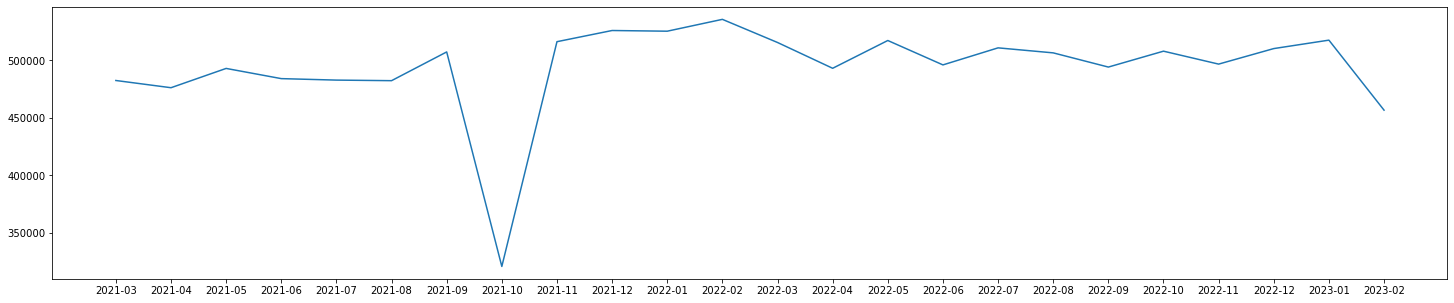

In [22]:
# création d'un plot affichant l'évolution du CA par mois depuis mars 2021
plt.figure(figsize = (25,5))
plt.plot(monthly_turnover['year_month'],monthly_turnover['turnover'])

<div class="alert alert-warning">
    <b> On remarque une grosse chute conséquente des ventes au mois d'octobre 2021</b></div>

In [23]:
# filtrage sur la période d'octobre 2021 
ventes_octobre = df_tableau_complet.loc[df_tableau_complet['year_month'] == '2021-10', :]
# création d'un colonne 'day' contenant le jour du mois où à eu lieu la transaction
ventes_octobre["day"] = ventes_octobre["date"].dt.day
# calcul du CA par jour en cumulant le prix pour chaque transaction et en regroupant par jour sur la colonne 'day'
ventes_octobre_jour = ventes_octobre.groupby(['day']).sum()
# reset index
ventes_octobre_jour = ventes_octobre_jour.reset_index()




C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\4165723791.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventes_octobre["day"] = ventes_octobre["date"].dt.day


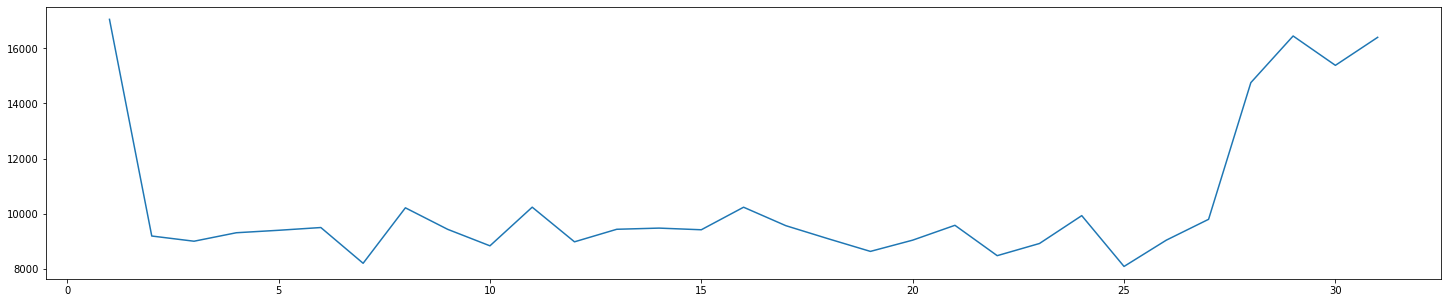

In [24]:
# création d'un plot affichant l'évolution du CA par jour durant le mois d'octobre 2021
plt.figure(figsize = (25,5))
plt.plot(ventes_octobre_jour['day'],ventes_octobre_jour['price'])

<div class="alert alert-warning">
<b> Les ventes chutent brusquement a partir du 2 octobre pour revenir à son niveau normal aux aux alentour du 28. On a cependant bien des ventes comptabilisées pour chaque jour d'octobre.</b></div>

In [25]:
# regroupement par catégorie et par jour
ventes_octobre_categ = ventes_octobre.groupby(['categ','day']).sum()
# reset index
ventes_octobre_categ = ventes_octobre_categ.reset_index()


In [26]:
# boucle permettant de calculer et d'afficher pour chaque catégorie le nombre de jour où le CA est != de 0 
for x in range(3):
    filtre_categ = ventes_octobre_categ.loc[ventes_octobre_categ['categ'] == x, :]
    nb_jour_vendant = filtre_categ.loc[filtre_categ['price'] != 0]['categ'].count()
    print(" il y a", nb_jour_vendant,"jours vendants pour la catégorie", x)

 il y a 31 jours vendants pour la catégorie 0
 il y a 5 jours vendants pour la catégorie 1
 il y a 31 jours vendants pour la catégorie 2


<div class="alert alert-warning">
<b> En analysant les ventes par catégorie, on remarque que les produits de catégorie 1 ne comptabilisent que 5 jours vendants sur le mois d'octobre contre 31 pour les autres catégories. Il y'a certainement une raison à cela, la rupture semble peu envisageable car les ventes stoppent brusquement pour reprendre leur niveau d'avant (sans report d'achat donc). Il semblerait que le problème soit lié aux données qui sont incomplètes.</b><div>

In [27]:
# Affichage des jours vendants de la catégorie 1 
listing_vendant = ventes_octobre_categ.loc[ventes_octobre_categ['categ'] == 1 , :]
listing_vendant

,categ,day,price,birth,volume
31,1.0,1,7003.79,678708,344
32,1.0,28,6317.99,623714,316
33,1.0,29,6425.18,643739,326
34,1.0,30,6753.69,667415,338
35,1.0,31,7261.67,675492,342


<div class="alert alert-warning">
<b> Quelles options s'offrent à nous ? Il semble difficile d'extrapoler les données de ventes, car si un evenement particulier a eu lieu sur cette période, il ne sera pas pris en compte (grosse sorties, temps-fort promotionnel etc...). Nous allons donc procéder aux analyses des résultats en excluant les chiffres d'octobre.</b></div>


In [28]:
# création d'un nouveau df excluant l'ensemble des données d'octobre 2021. 
daily_turnover = df_tableau_complet.loc[df_tableau_complet['year_month'] != '2021-10', :]
daily_turnover = daily_turnover.groupby(['formated_date_ymd']).sum()
daily_turnover = daily_turnover.reset_index()
daily_turnover.sort_values('formated_date_ymd', ascending=True)

,formated_date_ymd,price,categ,birth,volume
0,21-03-01,16575.852588,427.0,1904339,963
1,21-03-02,15497.082588,362.0,1858984,940
2,21-03-03,15198.690000,360.0,1801708,911
3,21-03-04,15196.070000,383.0,1785123,903
4,21-03-05,17471.370000,433.0,1865533,943
...,...,...,...,...,...
694,23-02-24,15207.890000,365.0,1767989,894
695,23-02-25,15761.250000,493.0,1790355,905
696,23-02-26,16304.720000,435.0,1759258,890
697,23-02-27,19170.810000,482.0,2195850,1110


In [29]:
# Calcul de la moyenne mobile sur une fenetre de 30 jours
daily_turnover['rolling_mean'] =  daily_turnover["price"].rolling(30).mean()
daily_turnover

,formated_date_ymd,price,categ,birth,volume,rolling_mean
0,21-03-01,16575.852588,427.0,1904339,963,NaN
1,21-03-02,15497.082588,362.0,1858984,940,NaN
2,21-03-03,15198.690000,360.0,1801708,911,NaN
3,21-03-04,15196.070000,383.0,1785123,903,NaN
4,21-03-05,17471.370000,433.0,1865533,943,NaN
...,...,...,...,...,...,...
694,23-02-24,15207.890000,365.0,1767989,894,16241.205690
695,23-02-25,15761.250000,493.0,1790355,905,16190.549271
696,23-02-26,16304.720000,435.0,1759258,890,16164.925271
697,23-02-27,19170.810000,482.0,2195850,1110,16284.848937


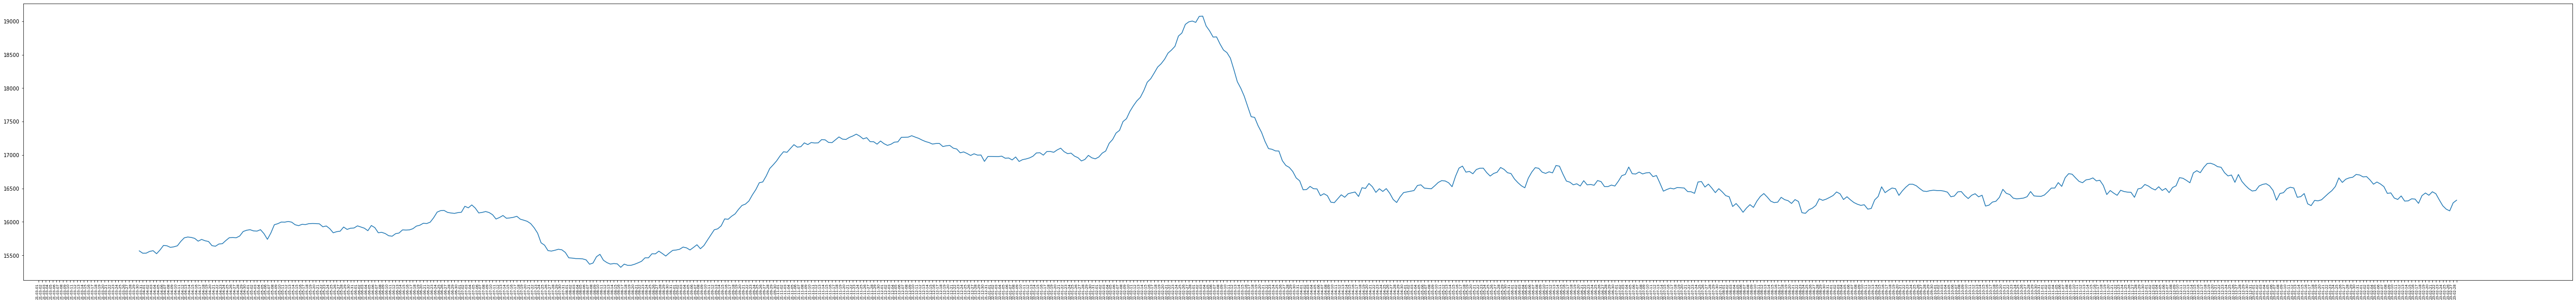

In [30]:
plt.figure(figsize = (90,10))

## ajustement des étiquettes de l'abcisse pour les rendre lisibiles
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontsize='x-small')
plt.plot(daily_turnover['formated_date_ymd'],daily_turnover['rolling_mean'])


### Bilan de l'analyse Chiffre d'Affaires : 

<div class="alert alert-success"><b>    
    
    
    - En absolu, un CA en recul entre le mois de janvier de février 2023, mais une tendance flat quand on regarde en 
    cumul mobile.
    
    - Un pic de vente entre février et fin mars 2022 
    Hypothèse: opération promo anniversaire (1 an du site)
    
    - Un problème notable sur la période d'octobre 2022 avec seulement 5j de vente sur la catégorie 1. 
    Hypothèse: données manquantes car les ventes ne semblent pas impactées avant et après (report d'achat / 
    rupture progressive...)


<b>---------------------------------------------------------------------------------------------------------------------</b>

## 2) Analyse produits

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\4017336424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] =  df["price"].rolling(nb_period).mean()
C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\4017336424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rolling_mean'] =  df["price"].rolling(nb_period).mean()
C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\4017336424.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

<function matplotlib.pyplot.show(close=None, block=None)>

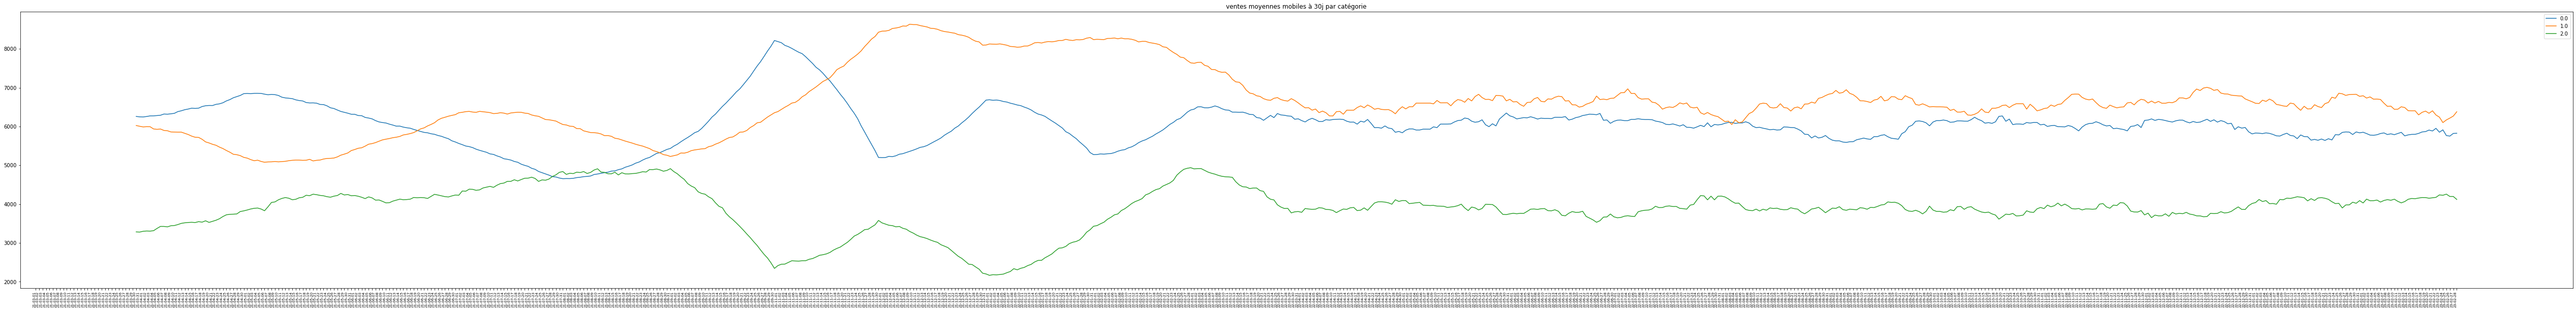

In [31]:
# Vision par catégorie moyenne mobile

## regroupement par catégorie et par jour
df_x  = df_tableau_complet.loc[df_tableau_complet['year_month'] != '2021-10', :]
df_categ_daily = df_x.groupby(['categ','formated_date_ymd']).sum()
df_categ_daily = df_categ_daily.reset_index()

def category_setup(category, nb_period):
    ## création d'un df dédié pour une catégorie, et calcul la moyenne mobile sur une périodicité (en j) donnée 
    df = df_categ_daily.loc[df_categ_daily['categ'] == category, :]
    df['rolling_mean'] =  df["price"].rolling(nb_period).mean()
    return df

# array contenant tous les noms des catégories
category_list = df_categ_daily['categ'].unique()

## creation du plot avec une courbe pour chaque catégorie de produits
## ajustement des étiquettes de l'abcisse pour les rendre lisibiles
plt.figure(figsize = (90,10))
plt.xticks(
    rotation=90,
    horizontalalignment='right',
    fontsize='x-small')

for categ in category_list:
    df = category_setup(categ, 30)
    plt.plot(df['formated_date_ymd'],df['rolling_mean'],label=categ)

plt.legend()
plt.title('ventes moyennes mobiles à 30j par catégorie')
plt.show   



Text(0.5, 1.0, 'répartition % volume par catégorie')

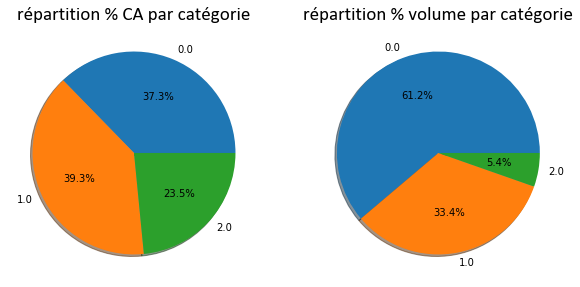

In [32]:
# création d'un df avec la vision du CA par catégorie
ca_par_categ = df_tableau_complet.groupby(['categ']).sum()
# reset index
ca_par_categ = ca_par_categ.reset_index()

# 
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10)) #ax1,ax2 refer to your two pies

# setup label / values des pie-charts

labels = ca_par_categ['categ']
values1 = ca_par_categ['price']
values2 = ca_par_categ['volume']


ax1.pie(values1,labels = labels, autopct = '%1.1f%%', shadow = True) #plot first pie
ax1.set_title("répartition % CA par catégorie",fontname='Calibri', fontsize=19)

ax2.pie(values2,labels = labels,autopct = '%1.1f%%', shadow = True) #plot second pie
ax2.set_title("répartition % volume par catégorie",fontname='Calibri', fontsize=19)


<div class="alert alert-info">
<b> La catégorie 2 a beau peser peu dans les volumes de vente du site (5.4%), elle dégage cependant 23.5% du chiffre d'affaires du site, on peut donc en déduire que ce sont des produits dont les prix sont assez elevés. Au contraire, la catégorie 0 représente 61.2% des volumes vendus, mais ne pèsent qu'a 37.3% dans le CA. </b></div>

<b>*TOP 10 DES PRODUITS VENDUS EN CHIFFRE D'AFFAIRES*</b>

In [33]:
# création d'un df avec la vision par produit (groupement par id_prod)
ca_par_produit = df_tableau_complet.groupby(['id_prod']).sum()
# reset index
ca_par_produit= ca_par_produit.reset_index()
# suppression des colonnes inutiles
ca_par_produit = ca_par_produit.drop(columns = ['birth','categ'])
# renommer la colonne price en turnover
ca_par_produit.rename(columns = {'price':'turnover'}, inplace = True)
# trier par CA et afficher le top 10
ca_par_produit.sort_values('turnover', ascending=False).head(10)


,id_prod,turnover,volume
3097,2_159,94893.50,650
3071,2_135,69334.95,1005
3046,2_112,65407.76,968
3035,2_102,60736.78,1027
3153,2_209,56971.86,814
2620,1_395,54356.25,1875
2592,1_369,54025.48,2252
3044,2_110,53846.25,865
3202,2_39,53060.85,915
3105,2_166,52449.12,228


<b>*TOP 10 DES PRODUITS VENDUS EN VOLUME*</b>

In [34]:
# trier par volume et afficher le top 10
ca_par_produit.sort_values('volume', ascending=False).head(10)

,id_prod,turnover,volume
2592,1_369,54025.48,2252
2645,1_417,45947.11,2189
2642,1_414,51949.40,2180
2734,1_498,49731.36,2128
2654,1_425,35611.04,2096
2630,1_403,35260.40,1960
2640,1_412,32484.15,1951
2641,1_413,34990.55,1945
2633,1_406,48106.59,1939
2634,1_407,30940.65,1935


<div class="alert alert-info"><b> On remarque l'ensemble des produits présents dans le top 10 des meilleurs ventes en volume sont des produits de la catégorie 1.0.</b></div>

<b>*FLOP 10 DES PRODUITS VENDUS EN CHIFFRE D'AFFAIRES*</b>

In [35]:
# trier par CA et afficher le flop 10
ca_par_produit.sort_values('turnover', ascending=False).tail(10)

,id_prod,turnover,volume
925,0_1840,2.56,2
2180,0_898,2.54,2
549,0_1498,2.48,1
802,0_1728,2.27,1
1785,0_541,1.99,1
665,0_1601,1.99,1
2080,0_807,1.99,1
719,0_1653,1.98,2
313,0_1284,1.38,1
595,0_1539,0.99,1


<div class="alert alert-info"><b> L'ensemble des produits qui dégagent le moins de CA sont dans la catégorie 0.0</b></div>

<b>*FLOP 10 DES PRODUITS VENDUS EN VOLUME*</b>

In [36]:
# trier par volume et afficher le flop 10
ca_par_produit.sort_values('volume', ascending=False).tail(10)

,id_prod,turnover,volume
1327,0_2201,20.99,1
166,0_1151,2.99,1
802,0_1728,2.27,1
3248,2_81,86.99,1
595,0_1539,0.99,1
313,0_1284,1.38,1
1793,0_549,2.99,1
549,0_1498,2.48,1
1785,0_541,1.99,1
2167,0_886,21.82,1


<div class="alert alert-info"><b> La quasi-totalité des produits qui dégagent le moins de volume sont issus de la catégorie 0.0 </b></div>

Text(0.5, 1.0, "Part d'offre par catégorie de produits")

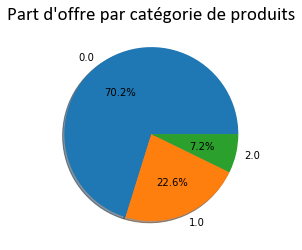

In [37]:
# création d'un df via le merge de ca_par_produit et data_product
assortiment_categ = pd.merge(ca_par_produit,data_products, on='id_prod', how='left')

# compter le nombre de produits pour chaque catégorie via groupby sur la variable 'categ'
df_assort_categ= assortiment_categ.groupby('categ').count()

# reset index
df_assort_categ = df_assort_categ.reset_index()
# création d'un pie-chart montrant la part d'offre de chaque catégorie (nb de ref sur la categ / nb de refs total)
plt.pie(labels=df_assort_categ['categ'], x=df_assort_categ['id_prod'], autopct='%.1f%%', shadow=True)
plt.title("Part d'offre par catégorie de produits", fontname='Calibri', fontsize=19)

<div class="alert alert-info"><b> Analyse : La catégorie 0 semble sur-représentée dans l'assortiment représentant 70.2% des références quand elle ne pèse que 37.3% du CA et 61.2% des volumes du site. Au contraire, la catégorie 1 semble sous représentée pesant 22.6% de l'assortiment total alors qu'elle dégage 39.3% du CA et 33.5% des volumes. Peut-être que des optimisations sont envisageable sur l'assortiment du site ? </b></div>

### Bilan de l'analyse Produits : 

<div class="alert alert-success"><b>    
    
    
    - En moyenne mobile, des tendances inverses entre les catégories 2 et 0
    Hypothèse: re-assignation de produits d'une catégorie à l'autre / effet de cannibalisation ?
    
    - La catégorie 0 pèse 37 % du CA et 61% des volumes, sur-représentée dans l'assortiment (70% des refs)
    
    - La catégorie 1 pèse 39 % du CA et 34% des volumes mais seulement 23% de l'assortiment
    
    - La catégorie 2 pèse 24% du CA pour seulement 5.4% des volumes et représente 7,2% de l'assortiment 
    
    - Les produits parmi les moins vendants (volume et CA) sont globalement des produits de la catégorie 0
    
    Piste logistique / merchandising : des optimisations d'assortiments sont peut-être envisageables
    
    Piste d'analyse: regarder également les produits présents sur le site et non-vendants.

<b>---------------------------------------------------------------------------------------------------------------------</b>

## <b> 3) Analyse clients </b>


Text(0.5, 1.0, 'Proportion H/F dans la clientèle du site')

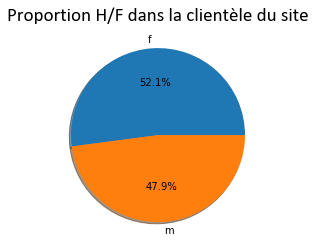

In [38]:
#### 1 - Proportion H/F dans la clientèle 

# créer un df à partir de la base data customer en excluant les clients test
df_data_client = data_customers.loc[(data_customers['client_id'] !='T_0') & (data_customers['client_id'] !='T_1'),:]
# compte le nombre de ligne correspondant à chaque valeur distincte de la variable 'sex'
df_sex_client = df_data_client.groupby(['sex']).count()
# reset index
df_sex_client = df_sex_client.reset_index()
# création d'un pie-chart montrant la part d'offre de chaque catégorie (nb de ref sur la categ / nb de refs total)
plt.pie(labels=df_sex_client['sex'], x=df_sex_client['client_id'], autopct='%.1f%%', shadow=True)
plt.title("Proportion H/F dans la clientèle du site", fontname='Calibri', fontsize=19)


<div class="alert alert-info"><b> Analyse : on remarque une prédominance de femmes dans la clientèle de notre site (52.1%). </b></div>

In [39]:
#### 2 - NB DE PRODUIT MOYEN PAR SESSION D'ACHAT 

# création d'une copie du df complet 
df_nb_produits = df_tableau_complet.copy()
# groupement des données sur la session ID
df_nb_produits = df_nb_produits.groupby(['session_id']).sum()
# calcul de la moyenne du nombre de livre par session
moy_produits = df_nb_produits['volume'].mean()
print("Lors d'une session d'achat, un client achète en moyenne", round(moy_produits,2),"produits.")


Lors d'une session d'achat, un client achète en moyenne 1.98 produits.


<div class="alert alert-info"><b> Analyse : Un client a achète en moyenne 2 produits par session d'achat </b></div>

Text(0.5, 1.0, "Répartition des clients par tranche d'age")

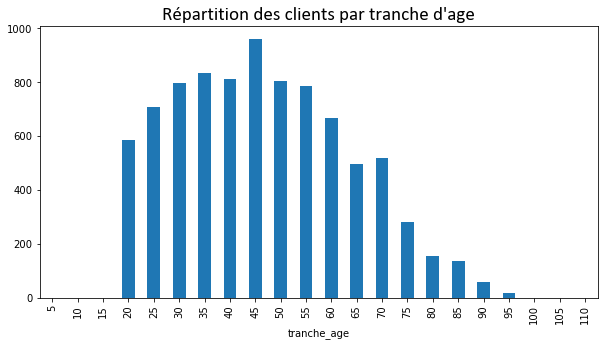

In [40]:
#### 3 - Répartition age clients 

# ajout colonne age dans le tableau complet
df_tableau_complet['age'] = 2023 - df_tableau_complet['birth']


#Représentation graphique de l'âge des clients par tranche de 5 ans

## création d'une colonne 'age' sur la base de la date de naissance et de l'année en cours (2023) 
df_data_client['age'] = 2023 - df_data_client['birth']

## discretisation par tranche de 5 ans 
df_data_client['tranche_age'] = pd.cut(df_data_client['age'], 
bins=[x for x in range(0,115, 5)],
labels=[x for x in range(5,115, 5)], 
right=True)

## compte le nombre de client par tranche d'âge
df_tranche = df_data_client.groupby('tranche_age').count()

## adapte la taille du graph
plt.figure(figsize = (10,5))

## génère le barplot
df_tranche['age'].plot.bar()
plt.title("Répartition des clients par tranche d'age", fontname='Calibri', fontsize=19)

<div class="alert alert-info"><b> Analyse : Notre clientèle se situe entre 15 et 100 ans avec une prédominance de la tranche 45/50 ans qui est la plus représentée.</b></div>

<div class="alert alert-info"><b>
Analyse: La courbe d'age semble suivre une loi normale (forme de courbe en cloche symétrique) </b></div>

In [41]:
# TEST DE NORMALITE - SHAPIRO-WILKS (ATTENTION CE TEST NE CONVIENT PAS AUX ECHANTILLONS TROP LARGES (>5000 individus))
shapiro(df_tranche['age'])

ShapiroResult(statistic=0.8384994864463806, pvalue=0.002139702206477523)

In [42]:
# TEST DE NORMALITE - ANDERSON-DARLING
anderson(df_tranche['age'])


AndersonResult(statistic=1.3820904448913218, critical_values=array([0.51 , 0.58 , 0.696, 0.812, 0.966]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [43]:
# TEST DE NORMALITE - KOLMOGOROV-SMIRNOV
kstest(df_tranche['age'], 'norm')

KstestResult(statistic=0.7272727272727273, pvalue=2.2446941996278384e-12)

<div class="alert alert-warning"><b> Analyse : la p-value étant inférieure à α =0.05, on peut donc conclure que l'échantillon de la population n'est pas normalement distribué pour la variable âge </b></div>

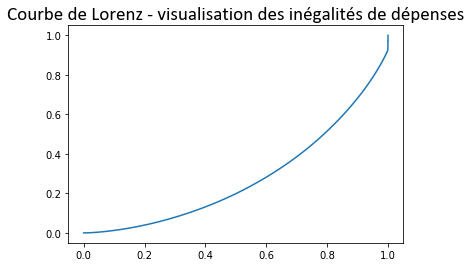

In [44]:
#### 4 - pour la courbe de Lorenz, il va me falloir le CA généré par client :

## création du df dédié à l'analyse client (excluant data octobre 2021)
df_client_ca = df_tableau_complet.loc[df_tableau_complet['year_month'] != '2021-10', :]

## groupby du df_tableau_complet sur la variable id_client 
df_client_ca = df_client_ca.groupby(['client_id']).sum()

## reset index
df_client_ca = df_client_ca.reset_index()

## renomme colonne price en expenses
df_client_ca.rename(columns = {'price':'expenses'}, inplace = True)

## + méthodo lorenz

depenses = df_client_ca['expenses']
n = len(depenses)
lorenz = np.cumsum(np.sort(depenses)) / depenses.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.title("Courbe de Lorenz - visualisation des inégalités de dépenses", fontname='Calibri', fontsize=19)

plt.show()


In [45]:
# Calcul de l'indice de Gini pour mesurer les inégalités de dépenses

AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print("Indice de gini =",gini)

Indice de gini = 0.4474063878798725


<div class="alert alert-info"><b> Analyse : la forme de la courbe et l'indice de Gini à 0.44 nous montre qu'il existe une disparité dans les dépenses des clients du site et que 20% des clients génère a eux seuls 50% du chiffre d'affaires site.</b></div>

### Bilan de l'analyse Clients : 

<div class="alert alert-success"><b>    
    
    - Notre clientèle est majoritairement féminine (52,1%)
    
    - Notre clientèle se situe entre 15 et 100 ans avec une prédominance de la tranche 45/50 ans qui est la plus représentée
    
    - La courbe de Lorenz et l'indice de Gini nous montrent des inégalités dans les dépenses client: 20% des
    clients génèrent à eux seuls 50% du CA

<b>---------------------------------------------------------------------------------------------------------------------</b>

<b>---------------------------------------------------------------------------------------------------------------------</b>

# II - Analyse bivariée

- 1/ le genre d’un client et les catégories des livres achetés
- 2/ l’âge des clients et le montant total des achats, 
- 3/ l'âge des clients et la fréquence d’achat, 
- 4/ l'âge des clients et la taille du panier moyen 
- 5/ l'âge des clients et les catégories des livres achetés.

## 1) Genre et catégorie
<b>genre = qualitative    
categorie = qualitative</b>

In [46]:
# exclusion des outliers (qui semblent être des sociétés et faussent donc la notion de 'genre')

liste= ['c_1609','c_4958','c_3454','c_6714']
df_tableau_complet = df_tableau_complet[~df_tableau_complet['client_id'].isin(liste)]

Text(0, 0.5, 'Part dans les achats (%)')

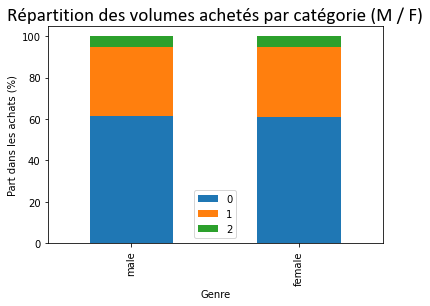

In [47]:

# filtre sur le genre (M/F) déterminé dans la fonction
df_male = df_tableau_complet.loc[df_tableau_complet['sex'] =='m',:]
# groupby par catégorie
df_male = df_male.groupby('categ').sum()
# reset index
df_male = df_male.reset_index()
# calcul du % volume de categ vs total des volumes
df_male['volume(%)'] = (df_male['volume'] / df_male['volume'].sum() * 100)

# même chose mais filtré sur 'f'
df_female = df_tableau_complet.loc[df_tableau_complet['sex'] =='f',:]
df_female = df_female.groupby('categ').sum()
df_female = df_female.reset_index()
df_female['volume(%)'] = (df_female['volume'] / df_female['volume'].sum() *100)

# création d'un tableau avec seulement les colonnes volume % 
percentage = {'male': df_male['volume(%)'], 'female': df_female['volume(%)']}

# transformation en df
df_percentage = pd.DataFrame(data=percentage)

# Changement de mise en forme
df_data = df_percentage.transpose()

# création d'un stacked bar chart
df_data.plot(kind='bar', stacked=True)
 
# ajoute titre et nom des axes
plt.title('Répartition des volumes achetés par catégorie (M / F)',fontname='Calibri', fontsize=19)
plt.xlabel('Genre')
plt.ylabel('Part dans les achats (%)')


<div class="alert alert-info"><b> Note: la répartition des volumes de vente entre les différentes catégories de livres que nous étudions ne semble pas en différer en fonction du genre du client</b></div>

In [48]:
# Création du tableau de contingence des variables "categ" et "sex"

X = "categ"
Y = "sex"

cont = df_tableau_complet[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

sex,f,m,Total
categ,,,
0.0,200904,186589,387493
1.0,111331,101017,212348
2.0,16980,15868,32848
Total,329215,303474,632689


In [49]:
# calcul du chi² sur la base du tableau de contingence précédemment crée

sc.stats_chi2, sc.stats_p, sc.stats_dof, sc.stats_exp = sc.stats.chi2_contingency(cont)

# Affichage du chi² observé
print("chi² =", sc.stats_chi2)
print("p_value =", sc.stats_p)
print("degré de liberté", sc.stats_dof)

chi² = 20.200173796862927
p_value = 0.002551063708568263
degré de liberté 6


<div class="alert alert-info"><b> Note: On remarque que la pvalue < α (=0.05), on peut donc rejeter l'hypothèse nulle et conclure que la variable catégorie de livre achetée est dépendante de la variable genre du client. </b></div>

In [50]:
# utilisation de cramer's V pour définir le degré de dépendance entre nos 2 variables 
sc.stats.contingency.association(cont, method='cramer', correction=False)

0.0019977328800928544

<div class="alert alert-info"><b> Note: Le résultat du Cramer V étant très bas (<0.01). On peut donc interpréter que le degrés de dépendance entre nos deux variables "sex" et "categ" est très faible. </b></div>

<b>---------------------------------------------------------------------------------------------------------------------</b>

## 2) Age et dépenses
<b>age = quantitative    
montant = quantitative</b>


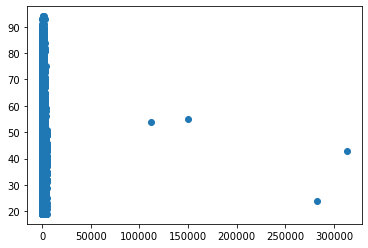

In [51]:
# merge du df_client_ca et du df data_customers pour récupérer la date de naissance
df_client_ca = pd.merge(df_client_ca,data_customers, on='client_id')

# ajout d'une colonne 'age' dans le tableau
df_client_ca['age'] = 2023 - df_client_ca['birth_y']

# génère le nuage de points
plt.scatter(df_client_ca['expenses'], df_client_ca['age'])

<div class="alert alert-warning"><b> Warning: des outliers semblent présents dans la variable 'expenses', il est nécéssaire de les isoler pour ne pas biaiser l'analyse </b></div>

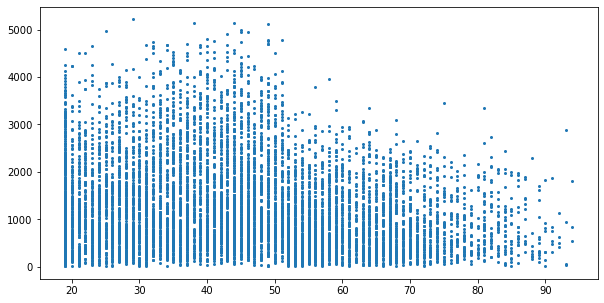

In [52]:
# visualisation en nuage de point
plt.figure(figsize = (10,5))

## exclusion des outliers (qui semblent être des sociétés et faussent donc la notion d'"age")
df_client_ca_wo_outliers =  df_client_ca.loc[df_client_ca['expenses'] < 50000, :]

## génère le nuage de points
plt.scatter(df_client_ca_wo_outliers['age'], df_client_ca_wo_outliers['expenses'], s=4)

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\4279351816.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_ca_wo_outliers['tranche_age'] = pd.cut(df_client_ca_wo_outliers['age'],


<AxesSubplot:xlabel='tranche_age', ylabel='expenses'>

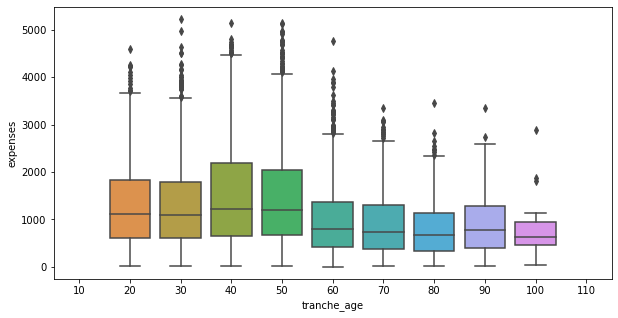

In [53]:
######## Visualisation discretisée par age via Boxplot ##### 

## discretisation par tranche de 5 ans 
df_client_ca_wo_outliers['tranche_age'] = pd.cut(df_client_ca_wo_outliers['age'], 
bins=[x for x in range(0,120, 10)],
labels=[x for x in range(10,120, 10)], 
right=True)


# ajuste la taille du graph
plt.figure(figsize = (10,5))

sns.boxplot(data=df_client_ca_wo_outliers, x="tranche_age", y="expenses")

<div class="alert alert-info"><b> 
On remarque des disparités sur les différences tranches d'age sur les dépenses min / max et médian qui semblent reculer plus l'age augmentent. 
    
    
    Hypothèse : Plus l'age du client est avancé, plus ses dépenses sur le sites sont moindres. 
    
    
</b></div>

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\1288636344.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_client_ca_wo_outliers['tranche_expenses'] = pd.cut(df_client_ca_wo_outliers['expenses'],


<AxesSubplot:xlabel='tranche_expenses'>

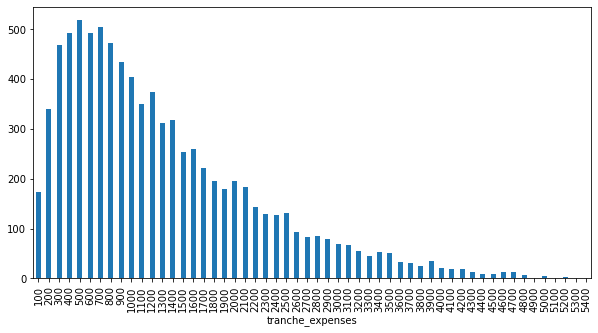

In [54]:
### vérification graphique pour savoir si la variable 'expenses' suit une loi normale

## discretisation par tranche de 1000€ 
df_client_ca_wo_outliers['tranche_expenses'] = pd.cut(df_client_ca_wo_outliers['expenses'], 
bins=[x for x in range(0,5500,100)],
labels=[x for x in range(100,5500,100)], 
right=True)

## compte le nombre de client par tranche d'âge
df_tranche_expenses = df_client_ca_wo_outliers.groupby('tranche_expenses').count()

## adapte la taille du graph
plt.figure(figsize = (10,5))

## génère le barplot
df_tranche_expenses['expenses'].plot.bar()


<div class="alert alert-info"><b> Analyse : La courbe de dépenses semble suivre une loi normale (la courbe forme une cloche symétrique). </b></div>

In [55]:
# TEST DE NORMALITE - SHAPIRO-WILKS
shapiro(df_tranche_expenses['expenses'])

ShapiroResult(statistic=0.8357804417610168, pvalue=3.247087533964077e-06)

In [56]:
# TEST DE NORMALITE - ANDERSON-DARLING
anderson(df_tranche_expenses['expenses'])


AndersonResult(statistic=3.198977522607443, critical_values=array([0.541, 0.616, 0.739, 0.862, 1.025]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [57]:
# TEST DE NORMALITE - KOLMOGOROV-SMIRNOV
kstest(df_tranche_expenses['expenses'], 'norm')

KstestResult(statistic=0.9245760278942958, pvalue=4.859949278739836e-61)

<div class="alert alert-warning"><b> Analyse : la p-value étant inférieure à α =0.05, on peut donc conclure que l'échantillon de la population n'est pas normalement distribué pour la variable dépenses </b></div>

In [58]:
# réalisation du test non-paramétrique de spearman (les tests de normalité étant négatifs pour la variable age)

df_client_ca_wo_outliers.corr('spearman')['age']['expenses']

-0.1790138847195916

In [59]:
# réalisation du test non-paramétrique de spearman via scipy pour vérif et p-value

rho_expenses, p_expenses = sc.stats.spearmanr(df_client_ca_wo_outliers['expenses'], df_client_ca_wo_outliers['age'])

print("rho =",rho_expenses, "|" ,"p =",p_expenses)

rho = -0.1790138847195916 | p = 8.17351013737343e-63


<div class="alert alert-info"><b> Analyse : 
     
La p-value étant inférieure à 0.01, on peut donc rejeter l'hypothèse nulle que les variables age et panier_moyen sont indépendantes. 
    
Le rho de pearson étant de -0.18 (et donc proche de 0), nous pouvons déduire qu'il existe une variation inverse modérée entre la variable age et panier_moyen. </b></div>

expense = -10.11 * age + 1694.94


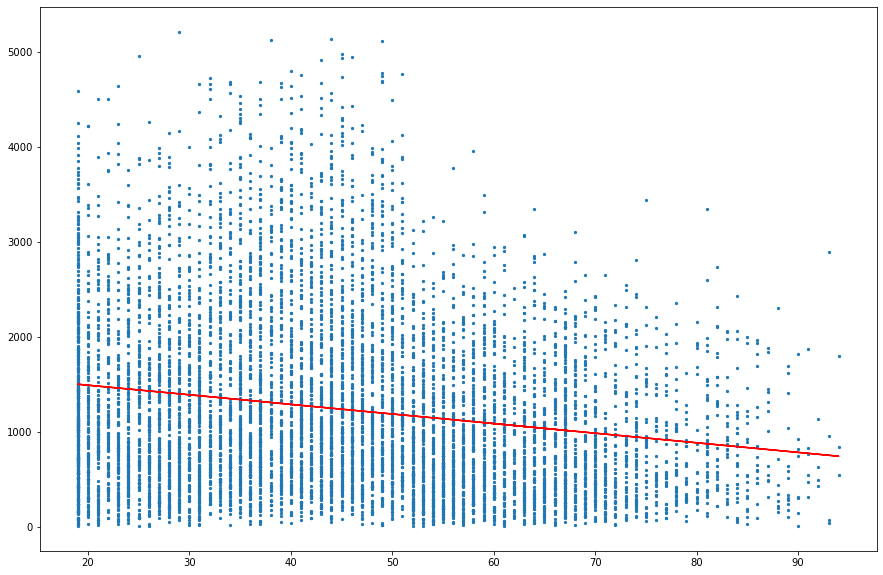

In [60]:
from sklearn.linear_model import LinearRegression

## exclusion des outliers
df_client_ca_wo_outliers =  df_client_ca.loc[df_client_ca['expenses'] < 50000, :]

# visualisation en nuage de point
fig, ax = plt.subplots(figsize=(15,10))
x_age, y_expense = (
    df_client_ca_wo_outliers['age'].values.reshape(-1, 1),
    df_client_ca_wo_outliers['expenses'].values.reshape(-1, 1),
)

# régression linaire
linreg = LinearRegression()
linreg.fit(x_age, y_expense)
y_pred = linreg.predict(x_age)

# génère le nuage de points
ax.scatter(x_age, y_expense, s=5)
# génère la droite de régression
ax.plot(x_age, y_pred, color='red')

# affiche l'équation de régression
print(f"expense = {linreg.coef_[0][0]:.2f} * age + {linreg.intercept_[0]:.2f}")
# affiche le graph
plt.show()

C:\Users\Greg\AppData\Local\Temp\ipykernel_5668\1351619070.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


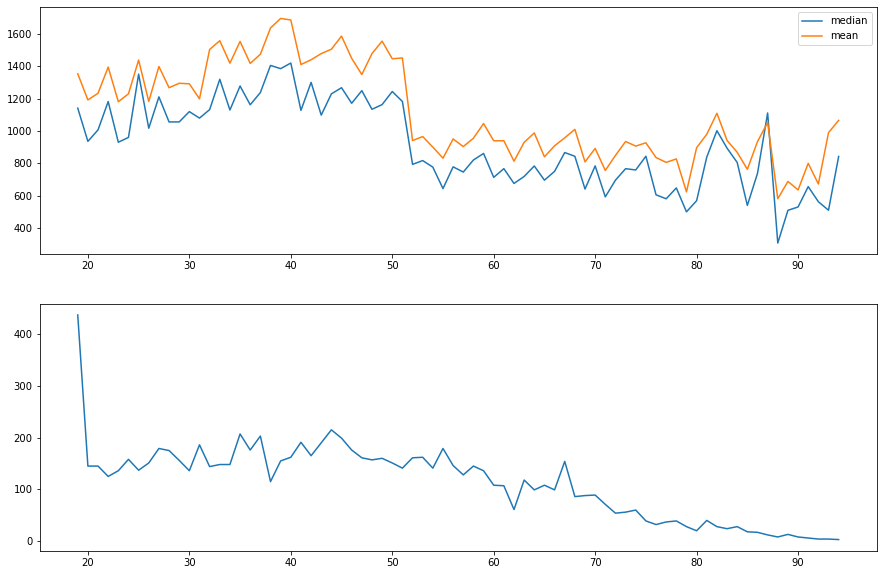

In [61]:
# visualisations complémentaires des moyennes / médianes par age + visualisation de la taille d'échantillon par tranche

df_exp = df_client_ca_wo_outliers.groupby('age').median()['expenses']
df_exp2 = df_client_ca_wo_outliers.groupby('age').mean()['expenses']
df_size = df_client_ca_wo_outliers.groupby('age').size()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,10))
ax1.plot(df_exp, label='median')
ax1.plot(df_exp2, label='mean')
ax1.legend()
ax2.plot(df_size)
fig.show()

<b>---------------------------------------------------------------------------------------------------------------------</b>

## 3) Age et fréquence
<b>age = quantitative    
fréquence d'achat = quantitative</b>

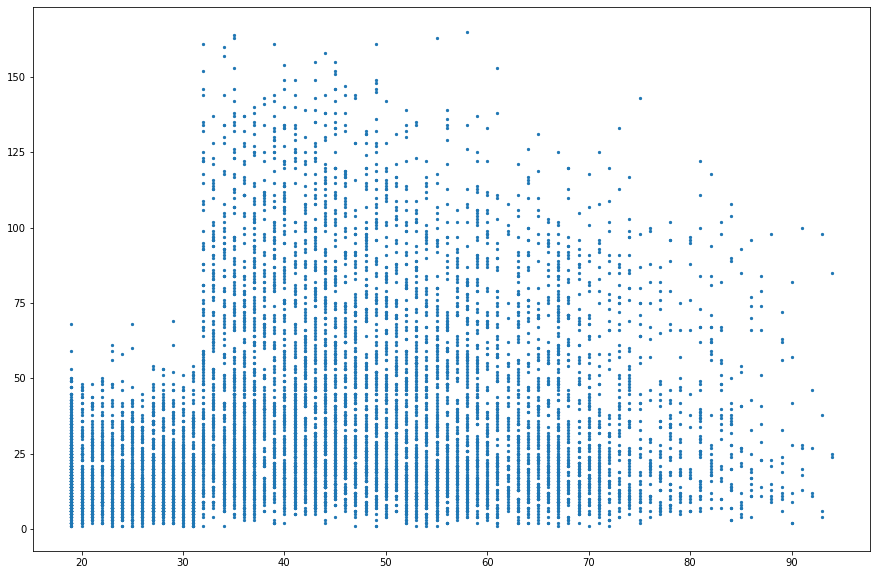

In [62]:
# création du df_frequence
df_frequence = df_tableau_complet.copy()
# supprimer les code session en double
df_frequence.drop_duplicates(subset ="session_id", keep = 'first', inplace=True)
# compter le nombre de session d'achat par client
df_frequence = df_frequence.groupby('client_id').count()
# supprimer les colonnes inutiles
df_frequence = df_frequence.drop(columns=['id_prod', 'date', 'price', 'categ', 'sex', 'birth', 'year_month', 'formated_date_ymd', 'volume', 'age'])
# récupérer les notions d'age et tranche d'age du df_data_client
df_frequence = pd.merge(df_frequence,df_data_client, on='client_id', how='left')

# ajuste la taille du graph
plt.figure(figsize = (15,10))
# visualisation en nuage de points
plt.scatter(df_frequence['age'], df_frequence['session_id'], s=5)

<div class="alert alert-warning"><b> Warning: on remarque un bon dans les fréquences d'achat des clients passé l'age de 32 ans.
Il semble nécéssaire de pousser l'analyse pour trouver des éléments expliquant cette tendance.

    Piste d'analyse: peut-être en lien avec les catégories de livres privilégiées par les jeunes ? 
</b></div>

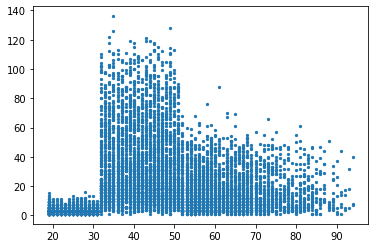

In [63]:
# visualisation par catégorie

##### TODO : créer une fonction pour simplifier le code et la génération des graphiques 

## création du df_frequence
df_frequence_categ = df_tableau_complet.copy()

# exclusion des outliers (sociétés)
liste= ['c_1609','c_4958','c_3454','c_6714']
df_frequence_categ = df_frequence_categ[~df_frequence_categ['client_id'].isin(liste)]

## supprimer les code session en double
df_frequence_categ.drop_duplicates(subset ="session_id", keep = 'first', inplace=True)

## création d'un df par catégorie
df_frequence_cat_0 = df_frequence_categ.loc[df_frequence_categ['categ']==0,:]
df_frequence_cat_1 = df_frequence_categ.loc[df_frequence_categ['categ']==1,:]
df_frequence_cat_2 = df_frequence_categ.loc[df_frequence_categ['categ']==2,:]

## compter le nombre de session d'achat par client
df_frequence_cat_0 = df_frequence_cat_0.groupby('client_id').count()
df_frequence_cat_1 = df_frequence_cat_1.groupby('client_id').count()
df_frequence_cat_2 = df_frequence_cat_2.groupby('client_id').count()

## reset index
df_frequence_cat_0 = df_frequence_cat_0.reset_index()
df_frequence_cat_1 = df_frequence_cat_1.reset_index()
df_frequence_cat_2 = df_frequence_cat_2.reset_index()

## filtrer
df_frequence_cat_0 = df_frequence_cat_0.loc[df_frequence_cat_0['session_id'] < 1000,:]
df_frequence_cat_1 = df_frequence_cat_1.loc[df_frequence_cat_1['session_id'] < 1000,:]
df_frequence_cat_2 = df_frequence_cat_2.loc[df_frequence_cat_2['session_id'] < 1000,:]

## supprimer les colonnes inutiles
df_frequence_cat_0 = df_frequence_cat_0.drop(columns=['id_prod', 'date', 'price', 'categ', 'sex', 'birth', 'year_month', 'formated_date_ymd', 'volume', 'age'])
df_frequence_cat_1 = df_frequence_cat_1.drop(columns=['id_prod', 'date', 'price', 'categ', 'sex', 'birth', 'year_month', 'formated_date_ymd', 'volume', 'age'])
df_frequence_cat_2 = df_frequence_cat_2.drop(columns=['id_prod', 'date', 'price', 'categ', 'sex', 'birth', 'year_month', 'formated_date_ymd', 'volume', 'age'])

## récupérer les notions d'age et tranche d'age du df_data_client
df_frequence_cat_0 = pd.merge(df_frequence_cat_0,df_data_client, on='client_id', how='left')
df_frequence_cat_1 = pd.merge(df_frequence_cat_1,df_data_client, on='client_id', how='left')
df_frequence_cat_2 = pd.merge(df_frequence_cat_2,df_data_client, on='client_id', how='left')

# visualisation nuage de points
plt.scatter(df_frequence_cat_0['age'], df_frequence_cat_0['session_id'], s=5)




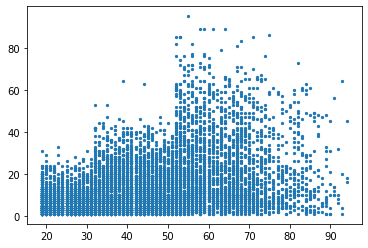

In [64]:
plt.scatter(df_frequence_cat_1['age'], df_frequence_cat_1['session_id'], s=5)

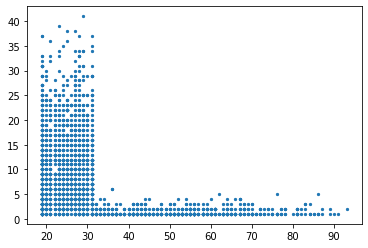

In [65]:
plt.scatter(df_frequence_cat_2['age'], df_frequence_cat_2['session_id'], s=5)

<div class="alert alert-info"><b> Analyse : Il existe effectivement des disparités en fonction des catégories de produits. </b></div>

<AxesSubplot:xlabel='tranche_frequence'>

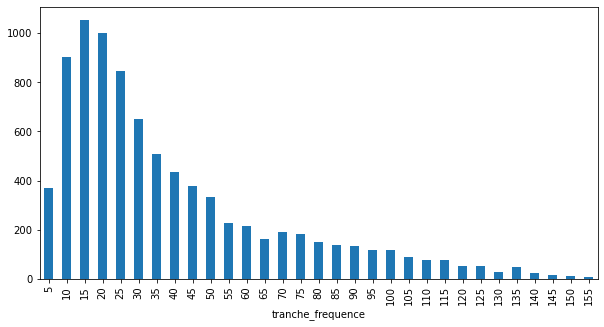

In [66]:
# vérification si la courbe de la variable frequence suit une loi normale

## discretisation par tranche de visites 
df_frequence['tranche_frequence'] = pd.cut(df_frequence['session_id'], 
bins=[x for x in range(0,160,5)],
labels=[x for x in range(5,160,5)], 
right=True)

## compte le nombre de client par tranche de frequence
df_tranche_frequence = df_frequence.groupby('tranche_frequence').count()

## adapte la taille du graph
plt.figure(figsize = (10,5))

## génère le barplot
df_tranche_frequence['session_id'].plot.bar()

<div class="alert alert-info"><b> Analyse : La courbe de fréquence semble suivre une loi normale (la courbe forme une cloche symétrique). </b></div>

In [67]:
# TEST DE NORMALITE - SHAPIRO-WILKS
shapiro(df_tranche_frequence['session_id'])

ShapiroResult(statistic=0.7857415080070496, pvalue=2.842081812559627e-05)

In [68]:
# TEST DE NORMALITE - ANDERSON-DARLING
anderson(df_tranche_frequence['session_id'])

AndersonResult(statistic=2.506525417980342, critical_values=array([0.522, 0.595, 0.713, 0.832, 0.99 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [69]:
# TEST DE NORMALITE - KOLMOGOROV-SMIRNOV
kstest(df_tranche_frequence['session_id'], 'norm')

KstestResult(statistic=0.9999999999999993, pvalue=0.0)

<div class="alert alert-warning"><b> Analyse: la p-value étant inférieure à α =0.05, on peut donc conclure que l'échantillon de la population n'est pas normalement distribué pour la variable fréquence </b></div>

In [70]:
# réalisation du test non-paramétrique de spearman

df_frequence.corr('spearman')['session_id']['age']

0.2123473949645802

In [71]:
# réalisation du test non-paramétrique de spearman via scipy pour vérif et p-value

rho_frequence, p_frequence = sc.stats.spearmanr(df_frequence['session_id'], df_frequence['age'])

print("rho =",rho_frequence, "|" ,"p =",p_frequence)

rho = 0.21234739496458024 | p = 3.180991037736119e-88


<div class="alert alert-info"><b> Analyse : 
     
La p-value étant inférieure à 0.01, on peut donc rejeter l'hypothèse nulle que les variables age et panier_moyen sont indépendantes. 
    
Le rho de pearson étant de 0.21 (et donc proche de 0), nous pouvons déduire qu'il existe une variation positive modérée entre la variable age et panier_moyen. </b></div>

frequence = 0.30 * age + 23.69


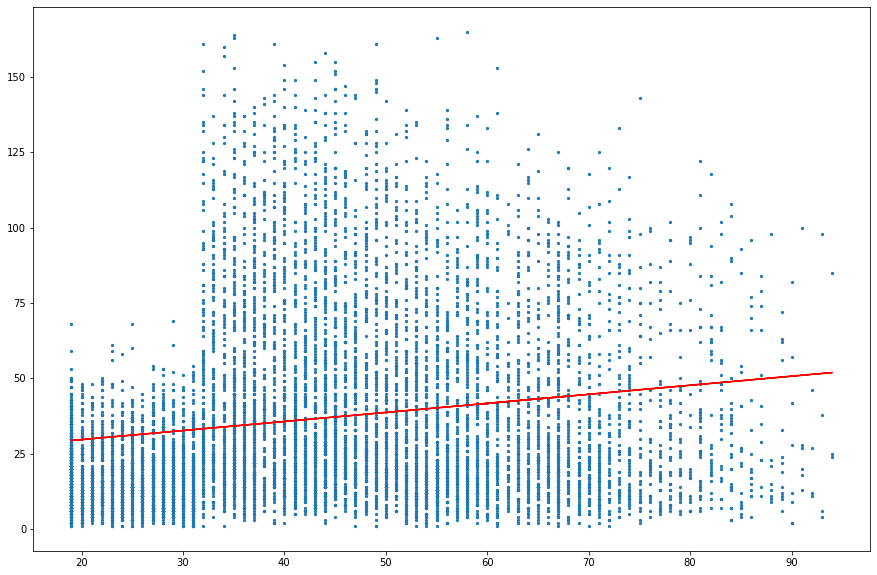

In [72]:
# visualisation en nuage de point
fig, ax = plt.subplots(figsize=(15,10))
x_age, y_expense = (
    df_frequence['age'].values.reshape(-1, 1),
    df_frequence['session_id'].values.reshape(-1, 1),
)

# régression linaire
linreg = LinearRegression()
linreg.fit(x_age, y_expense)
y_pred = linreg.predict(x_age)

# génère le nuage de points
ax.scatter(x_age, y_expense, s=5)
# génère la droite de régression
ax.plot(x_age, y_pred, color='red')

# affiche l'équation de régression
print(f"frequence = {linreg.coef_[0][0]:.2f} * age + {linreg.intercept_[0]:.2f}")
# affiche le graph
plt.show()

<b>---------------------------------------------------------------------------------------------------------------------</b>

## 4) Age et panier
<b>age = quantitative    
panier moyen = quantitative</b>

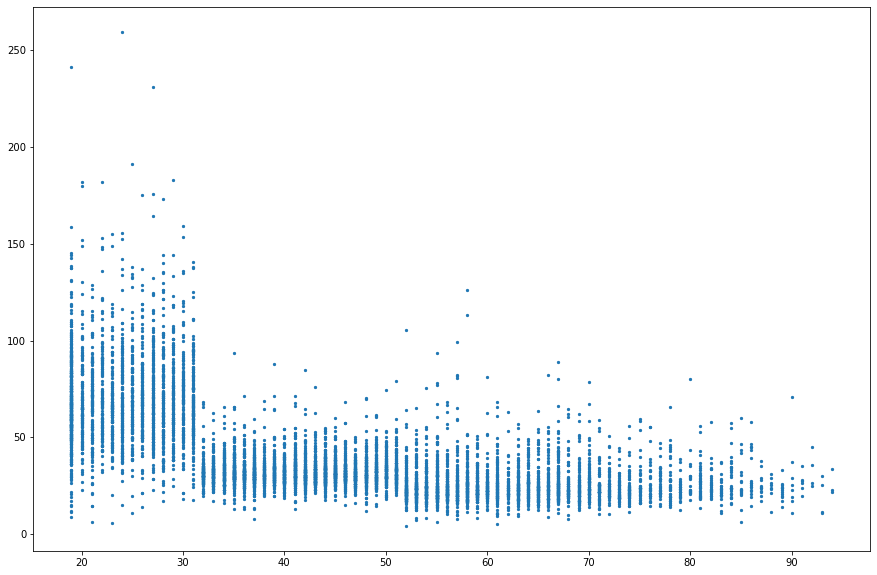

In [73]:
# crée un df_panier en groupant par client_id
df_panier = df_tableau_complet.groupby('client_id').sum().reset_index()

# exclusion des outliers (sociétés)
liste= ['c_1609','c_4958','c_3454','c_6714']
df_panier = df_panier[~df_panier['client_id'].isin(liste)]

# supprime les colonne superflues
df_panier = df_panier.drop(columns=['categ','birth','age'])
# merge le df_panier avec le df_frequence pour récupérer l'age, les tranches d'âge, la fréquence d'achat (session_id)
df_panier = pd.merge(df_panier,df_frequence, on='client_id', how='left')
# calcul le panier moyen (somme totale dépensée par le client / fréquence d'achat)
df_panier['panier_moyen'] = df_panier['price'] / df_panier['session_id']

# ajuste la taille du graph
plt.figure(figsize = (15,10))
# visualisation en nuage de points
plt.scatter(df_panier['age'], df_panier['panier_moyen'], s=5
           )

<AxesSubplot:xlabel='tranche_age', ylabel='panier_moyen'>

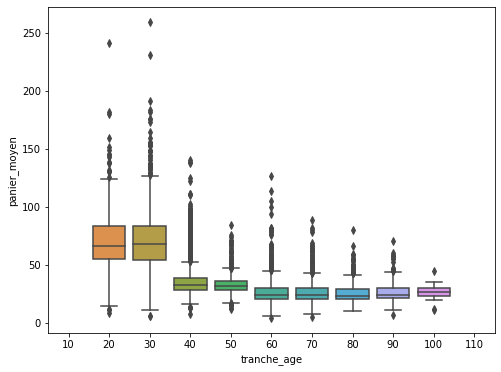

In [74]:
######## Visualisation discretisée via Boxplot ##### 

## discretisation par tranche de 5 ans 
df_panier['tranche_age'] = pd.cut(df_panier['age'], 
bins=[x for x in range(0,120, 10)],
labels=[x for x in range(10,120, 10)], 
right=True)


# ajuste la taille du graph
plt.figure(figsize = (8,6))

sns.boxplot(data=df_panier, x="tranche_age", y="panier_moyen")

<div class="alert alert-warning"><b> 
Warning: on remarque un recul net du montant du panier moyen des clients passé l'age de 32 ans.
    
    Piste d'analyse: peut-être également en lien avec les catégories de livres privilégiées par les jeunes ? Le nombre de livre achetés par session d'achat ?
</b>

<div class="alert alert-info"><b> 

    Hypothèse : Le panier moyen des clients semblent reculer plus l'age du client est avancé. 

Note : afin de déterminer le type de test statistique à mettre en place, 
il est nécéssaire au préalable de déterminer si la distribution de la variable 'panier_moyen' suit une loi normale 
    
</b></div>

<AxesSubplot:xlabel='tranche_panier'>

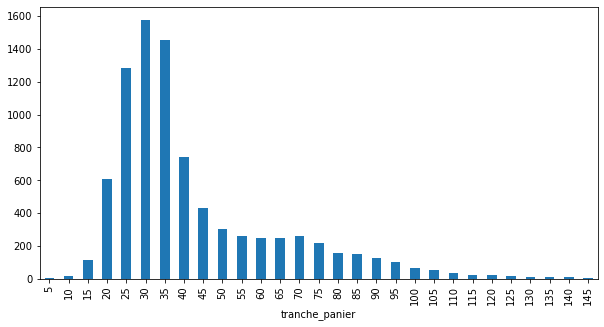

In [75]:
# vérification si la courbe de la variable panier moyen suit une loi normale

## discretisation par tranche de 10€ 
df_panier['tranche_panier'] = pd.cut(df_panier['panier_moyen'], 
bins=[x for x in range(0,150,5)],
labels=[x for x in range(5,150,5)], 
right=True)

## compte le nombre de client par tranche d'âge
df_tranche_panier = df_panier.groupby('tranche_panier').count()

## adapte la taille du graph
plt.figure(figsize = (10,5))

## génère le barplot
df_tranche_panier['panier_moyen'].plot.bar()

<div class="alert alert-info"><b> Analyse : La courbe de panier semble suivre une loi normale (forme de courbe en cloche symétrique) </b></div>

In [76]:
# TEST DE NORMALITE - SHAPIRO-WILKS
shapiro(df_tranche_panier['panier_moyen'])

ShapiroResult(statistic=0.6723679304122925, pvalue=8.64895469021576e-07)

In [77]:
# TEST DE NORMALITE - ANDERSON-DARLING
anderson(df_tranche_panier['panier_moyen'])

AndersonResult(statistic=3.6514167201458534, critical_values=array([0.52 , 0.592, 0.71 , 0.828, 0.985]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [78]:
# TEST DE NORMALITE - KOLMOGOROV-SMIRNOV
kstest(df_tranche_panier['panier_moyen'], 'norm')

KstestResult(statistic=0.9772498680518208, pvalue=4.5036400396516487e-48)

<div class="alert alert-warning"><b> Analyse : la p-value étant inférieure à α =0.05, on peut donc conclure que l'échantillon de la population n'est pas normalement distribué pour la variable panier </b></div>

In [79]:
# réalisation du test non-paramétrique de spearman

df_panier.corr('spearman')['panier_moyen']['age']

-0.7012152941599683

In [80]:
# réalisation du test non-paramétrique de spearman via scipy pour vérif et p-value

rho_panier, p_panier = sc.stats.spearmanr(df_panier['panier_moyen'], df_panier['age'])

print("rho =",rho_panier, "|" ,"p =",p_panier)

rho = -0.7012152941599682 | p = 0.0


<div class="alert alert-info"><b> Analyse : 
     
La p-value étant inférieure à 0.01, on peut donc exclure l'hypothèse nulle que les variables age et panier_moyen sont indépendantes. 
    
Le rho de pearson étant de -0.70 (et donc proche de -1), nous pouvons déduire qu'il existe une variation inverse significative entre la variable age et panier_moyen. </b></div>

panier_moyen = -0.85 * age + 78.36


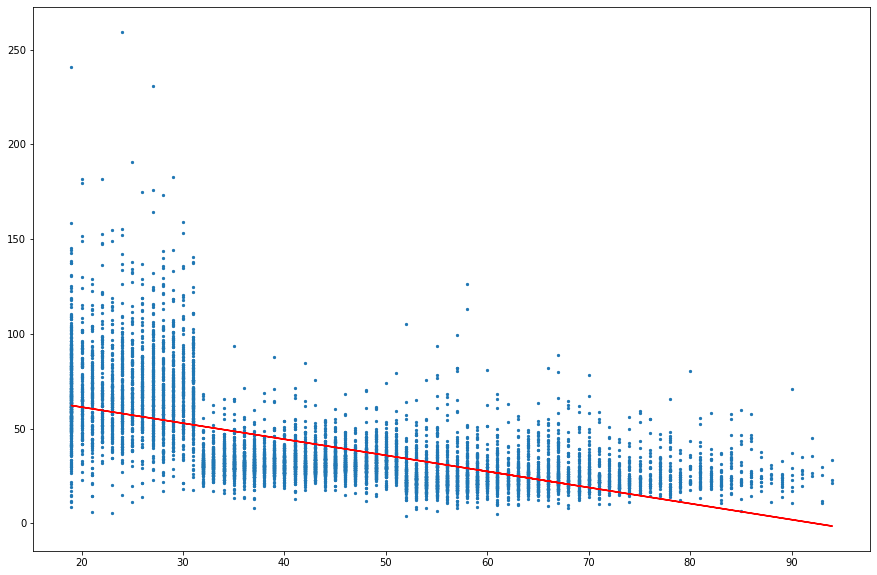

In [81]:
# setup visualisation en nuage de point
fig, ax = plt.subplots(figsize=(15,10))
x_age, y_expense = (
    df_panier['age'].values.reshape(-1, 1),
    df_panier['panier_moyen'].values.reshape(-1, 1),
)

# régression linaire
linreg = LinearRegression()
linreg.fit(x_age, y_expense)
y_pred = linreg.predict(x_age)

# génère le nuage de points
ax.scatter(x_age, y_expense, s=5)
# génère la droite de régression
ax.plot(x_age, y_pred, color='red')

# affiche l'équation de régression
print(f"panier_moyen = {linreg.coef_[0][0]:.2f} * age + {linreg.intercept_[0]:.2f}")
# affiche le graph
plt.show()

<b>---------------------------------------------------------------------------------------------------------------------</b>

## 5) Age et catégorie
<b> age = quantitative    
catégorie = qualitative</b>

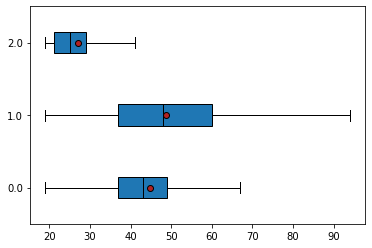

In [82]:
# 5/ l'âge des clients et les catégories des livres achetés.
# age = quantitative
# catégorie = qualitative

X = "categ" # qualitative
Y = "age" # quantitative

# On ne garde que les ages
sous_echantillon = df_tableau_complet.copy()
    
    ## exclusion des outliers (sociétés)
liste= ['c_1609','c_4958','c_3454','c_6714']
sous_echantillon= sous_echantillon[~sous_echantillon['client_id'].isin(liste)]

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

<div class="alert alert-info"><b> Analyse : on remarque une différence notable de l'age min / max / moyen et médian en fonction des catégories de produits.

    Hypothèse : L'age du client semble avoir une influence sur les catégories de produits qu'il achète sur le site. 
  </b></div>

In [83]:
# setup test Kruskal-Wallis
df_categ_0 = df_tableau_complet.loc[df_tableau_complet['categ']==0,:]
df_categ_1 = df_tableau_complet.loc[df_tableau_complet['categ']==1,:]
df_categ_2 = df_tableau_complet.loc[df_tableau_complet['categ']==2,:]
df_categ_0_2 = df_tableau_complet.loc[df_tableau_complet['categ']!=1,:]

sc.stats.kruskal(df_categ_0['age'], df_categ_1['age'], df_categ_2['age'])


KruskalResult(statistic=72214.83433330593, pvalue=0.0)

<div class="alert alert-info"><b> Analyse : On remarque que la pvalue < α (=0.05), on peut donc exclure l'hypothèse que l'age et les catégories de livres achetées sont indepéndants. Il existe bien une disparité d'âge médian des client entre les différentes catégories de livres commercialisés sur le site. </b></div>

### Bilan des analyses bivariées : 

<div class="alert alert-success"><b>    
    
- Les tests de normalité rejetent l'hypothèse selon laquelle les variables age / dépenses / fréquence / panier ont une une distribution suivant une loi normale.
    
- Les tests statistiques utilisés pour cette analyse sont donc non-paramétriques.
    
- Résultat des tests statistiques :
 
        - Genre / Catégorie : 
                    Analyse visuelle - pas de différence clairement visible 
                    Hypothèse d'indépendance - rejetée par test Chi² (p-value < 0.05) 
                    Degré de dépendance - faible (Cramer's V < 0.01)
        - Age / Dépenses : 
                    Analyse visuelle - légère différence visible selon l'âge
                    Hypothèse d'indépendance - rejetée par test Pearson (p-value < 0.05)
                    Degré de dépendance - modérée, inverse (rho = -0,18)
                    Les dépenses reculent en fonction de l'age en moyenne à hauteur de -10,11€ par an supplémentaire
        - Age / Fréquence :
                    Analyse visuelle - disparités très visibles en fonction de l'age
                    Hypothèse d'indépendance - rejetée par test Pearson (p-value < 0.05)
                    Degré de dépendance - modérée, positive (rho = 0,21)
                    La fréquence d'achat augmente en fonction de l'age en moyenne à hauteur de 0.3 acte de plus par an
        - Age / Panier : 
                    Analyse visuelle - disparités très visibles en fonction de l'age
                    Hypothèse d'indépendance - rejetée par test Pearson (p-value < 0.05)
                    Degré de dépendance - significative, inverse (rho = -0,7)
                    Le panier moyen se réduit en fonction de l'age en moyenne à hauteur de 0.85€ de moins par an
        - Age / Catégorie : 
                    Analyse visuelle - disparités très visibles en fonction de l'age
                    Hypothèse d'indépendance - rejetée par test Kruskal-Wallis (p-value < 0.05)
                    Il y'a bien une disparité d'age des clients en fonction de la catégorie. 

<b>---------------------------------------------------------------------------------------------------------------------    
</b>


<b>---------------------------------------------------------------------------------------------------------------------    
</b>

<b> Annexes d'aide à l'analyse </b>

In [84]:

# aggrégation via groupby sur la variable 'year-month' pour calculer le CA mensuel (via la somme en colonne 'price')
monthly_turnover_2 = df_categ_2.groupby(['year_month']).sum()
monthly_turnover_2 = monthly_turnover_2.reset_index()
monthly_turnover_2 = monthly_turnover_2.loc[monthly_turnover['year_month'] != "2021-10",:]

# aggrégation via groupby sur la variable 'year-month' pour calculer le CA mensuel (via la somme en colonne 'price')
monthly_turnover_0 = df_categ_0.groupby(['year_month']).sum()
monthly_turnover_0 = monthly_turnover_0.reset_index()
monthly_turnover_0 = monthly_turnover_0.loc[monthly_turnover['year_month'] != "2021-10",:]

# aggrégation via groupby sur la variable 'year-month' pour calculer le CA mensuel (via la somme en colonne 'price')
monthly_turnover_1 = df_categ_1.groupby(['year_month']).sum()
monthly_turnover_1 = monthly_turnover_1.reset_index()
monthly_turnover_1 = monthly_turnover_1.loc[monthly_turnover['year_month'] != "2021-10",:]

# aggrégation via groupby sur la variable 'year-month' pour calculer le CA mensuel (via la somme en colonne 'price')
monthly_turnover_0_2 = df_categ_0_2.groupby(['year_month']).sum()
monthly_turnover_0_2 = monthly_turnover_0_2.reset_index()
monthly_turnover_0_2 = monthly_turnover_0_2.loc[monthly_turnover_0_2['year_month'] != "2021-10",:]

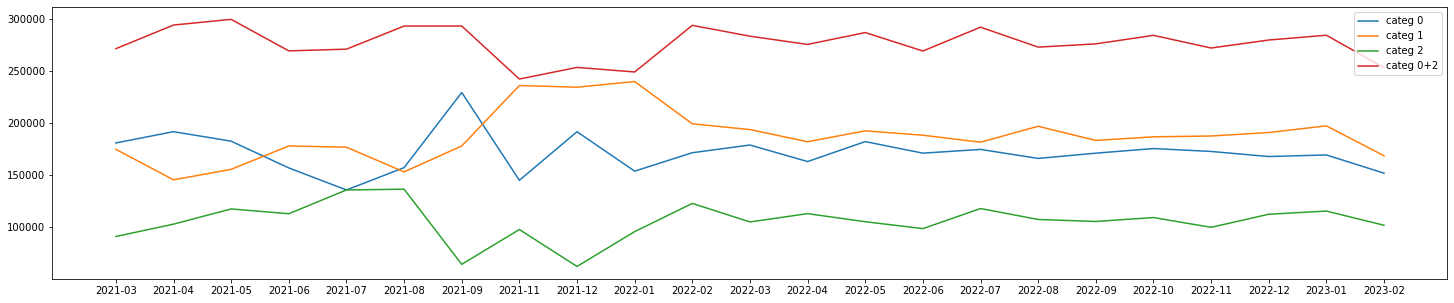

In [85]:
# création d'un plot affichant l'évolution du CA par mois depuis mars 2021
plt.figure(figsize = (25,5))
plt.plot(monthly_turnover_0['year_month'],monthly_turnover_0['price'], label = 'categ 0')
plt.plot(monthly_turnover_1['year_month'],monthly_turnover_1['price'], label = 'categ 1')
plt.plot(monthly_turnover_2['year_month'],monthly_turnover_2['price'], label = 'categ 2')
plt.plot(monthly_turnover_0_2['year_month'],monthly_turnover_0_2['price'], label = 'categ 0+2')
plt.legend()


In [86]:
#### 2 - NB DE PRODUIT MOYEN PAR SESSION D'ACHAT PAR AGE

# création d'une copie du df complet 
df_nb_produits = df_tableau_complet.copy()

# exclusion des outliers (sociétés)
liste= ['c_1609','c_4958','c_3454','c_6714']
df_nb_produits = df_nb_produits[~df_nb_produits['client_id'].isin(liste)]

# groupement des données sur la session ID
df_nb_produits = df_nb_produits.groupby(['session_id']).sum().reset_index()
# recalcul de l'âge qui est faussé suite au groupby (age = age/volume)
df_nb_produits['age'] = df_nb_produits['age']/df_nb_produits['volume']

## discretisation par tranche d'age
df_nb_produits['tranche_age'] = pd.cut(df_nb_produits['age'], 
bins=[x for x in range(0,105,5)],
labels=[x for x in range(5,105,5)], 
right=True)

df_nb_produits = df_nb_produits.groupby(['tranche_age']).mean().reset_index()





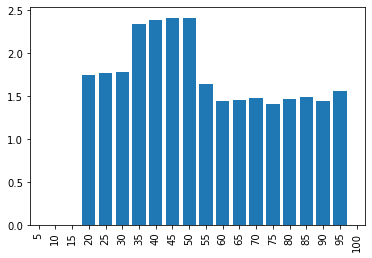

In [87]:
df_nb_produits['volume'].plot.bar()

y = df_nb_produits['volume']
x = df_nb_produits['tranche_age']
y_pos = np.arange(len(x))

# Create bars
plt.bar(y_pos, y )

# Create names on the x-axis
plt.xticks(y_pos, x)

# Show graphic
plt.show()
